# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
import numpy as np  
import array 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 100)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
regressor = DecisionTreeRegressor(random_state=0,max_depth=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
y_pred = regressor.predict(X_test)
print(y_pred)

[133869.23932088  99693.78343949 109591.27607362 ...  76092.36331325
 117103.87426407  99693.78343949]


4 **Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

498064673.33102685
22317.362598009353


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
#rmses_test = array.array(rmse)
rmses_test = []
rmses_train = []
for i in range (1,30,5):
    regressor = DecisionTreeRegressor(random_state=0,max_depth=i)
    regressor.fit(X_train, y_train)
    y_pr = regressor.predict(X_train)
    y_pred = regressor.predict(X_test)
    rmses_train.extend([np.sqrt(mean_squared_error(y_train, y_pr)).tolist()])
    rmses_test.extend([np.sqrt(mean_squared_error(y_test, y_pred)).tolist()])  

In [8]:
rmses_test

[27069.52308311684,
 21935.58980437242,
 22546.389989107796,
 24586.392636204975,
 25609.65255678811,
 25517.615332866197]

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

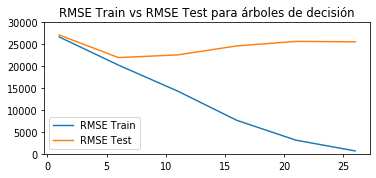

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

plt.figure( figsize=(6,2.5), dpi = 70)
plt.plot(range(1,30, 5), rmses_train, label='RMSE Train')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Test')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Train vs RMSE Test para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [10]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
k= 5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_predict))
print('RMSE valor para k= ' , k , ' es:', error)

RMSE valor para k=  5  es: 23444.705082192177


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [11]:
# Calculá los cambio en el rmse en esta celda
rmses_train = []
rmses_test = [] 
for K in range(29):
    K = K+1
    knn = KNeighborsRegressor(n_neighbors = K)
    knn.fit(X_train, y_train) 
    y_pr = knn.predict(X_train) 
    y_pred = knn.predict(X_test) 
    rmses_train.extend([np.sqrt(mean_squared_error(y_train ,y_pr))])
    rmses_test.extend([np.sqrt(mean_squared_error(y_test,y_pred))])

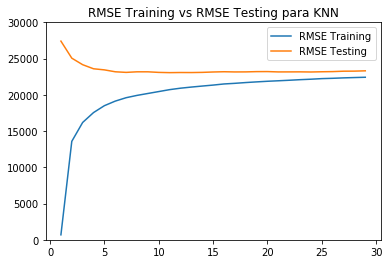

In [12]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

In [13]:
regressor = DecisionTreeRegressor(random_state=0,max_depth=5)

#validarlo
#regressor.fit(X_train, y_train)
#regressor_predict = regressor.predict(X_train)
#reg_mse = np.sqrt(mean_squared_error(y_train, regressor_predict))


Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [14]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [15]:
score = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = nmsq2rmse(score)
print(rmse_scores)

[22132.8586909  22133.98668222 22479.26359551 22350.87803133
 22268.70351157 22063.33884439 21861.68835884 21765.47254023
 21272.09642705 21119.98333393]


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [16]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [17]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [18]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,130000.000,133869.239,3869.239
1,76000.000,99693.783,23693.783
2,100000.000,109591.276,9591.276
3,115000.000,133869.239,18869.239
4,62000.000,90360.924,28360.924
5,149000.000,135984.187,13015.813
6,65000.000,76092.363,11092.363
7,109000.000,109591.276,591.276
8,111000.000,135984.187,24984.187
9,149000.000,138804.762,10195.238
